# File: Background plots for coding sample
Project: Trade war on labor market\
Author: Xing Xu\
Created in Nov. 2021\
Description: Import tariff on US trade and labor market\
Use tariff data from Bown (2021) and trade data from U.S. Census Bureau.

### Bilateral tariff plot

In [10]:
# Packages you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import FancyArrowPatch
os.chdir(r'C:/Coding sample')

In [5]:
# Graph of the timeline of tariff changes of US-China trade war
tariffdata = pd.read_excel('input_data/Bilateral_Tariff.xlsx', keep_default_na = False)
# Data imported from Bown(2021)
tariffdata['ChinatariffonUS'] = pd.to_numeric(tariffdata['ChinatariffonUS'], errors = 'coerce')
tariffdata['UStariffonChina'] = pd.to_numeric(tariffdata['UStariffonChina'], errors = 'coerce')
tariffdata['Date'] = pd.to_datetime(tariffdata['Date'], infer_datetime_format=True)
tariffdata = tariffdata.set_index('Date')

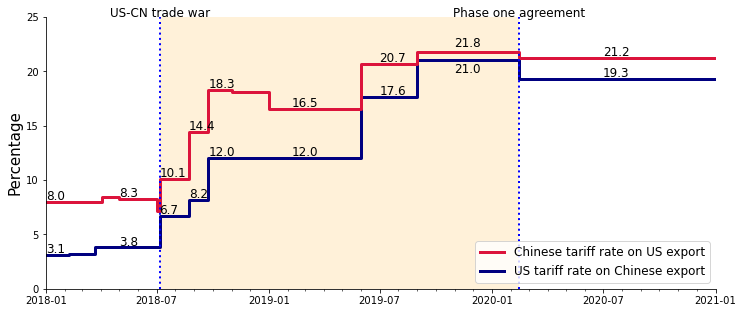

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.step(tariffdata.index, tariffdata['UStariffonChina'], \
        color = 'navy', linewidth = 3, \
        where = 'post',\
        label = 'US tariff rate on Chinese export')
ax.step(tariffdata.index, tariffdata['ChinatariffonUS'], \
        color = 'crimson', linewidth = 3, \
        where = 'post',\
        label = 'Chinese tariff rate on US export')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize = 12 ,loc = 4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0, 25]) 
ax.set_xlim([dt.datetime(2018,1,1), dt.datetime(2021,1,1)]) 
ax.set_ylabel('Percentage', fontsize = 15)
# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

ax.axvline(x = dt.datetime(2018,7,6), color='blue',\
           linewidth=2, linestyle = 'dotted')
ax.annotate('US-CN trade war', \
             (dt.datetime(2018,7, 6), 25), \
             color='black', ha='center', \
             size=12)
ax.axvline(x = dt.datetime(2020,2,14), color='blue',\
           linewidth=2, linestyle = 'dotted')
ax.annotate('Phase one agreement', \
             (dt.datetime(2020,2,14), 25), \
             color='black', ha='center', \
             size=12)
for i in ['2018-01-01','2018-05-01','2018-07-06', '2018-08-23',\
          '2018-09-24', '2019-02-07', '2019-07-01', '2020-07-01']:
    ax.annotate('{:.1f}'.format(tariffdata.loc[i, 'ChinatariffonUS']), \
                 (dt.datetime.strptime(i, '%Y-%m-%d'), \
                  tariffdata.loc[i, 'ChinatariffonUS']+ 0.2), \
                 color='black', ha='left',\
                 size=12)
    ax.annotate('{:.1f}'.format(tariffdata.loc[i, 'UStariffonChina']),\
                 (dt.datetime.strptime(i, '%Y-%m-%d'), \
                  tariffdata.loc[i, 'UStariffonChina']+ 0.2), \
                 color='black', ha='left', \
                 size=12)
ax.annotate('{:.1f}'.format(tariffdata.loc['2019-09-01', 'ChinatariffonUS']), \
            (dt.datetime.strptime('2019-10-31', '%Y-%m-%d'), \
            tariffdata.loc['2019-09-01', 'ChinatariffonUS']+ 0.2), \
            color='black', ha='left',\
            va='bottom', size=12)
ax.annotate('{:.1f}'.format(tariffdata.loc['2019-09-01', 'UStariffonChina']),\
            (dt.datetime.strptime('2019-10-31', '%Y-%m-%d'), \
            tariffdata.loc['2019-09-01', 'UStariffonChina']- 0.2), \
            color='black', ha='left', \
            va = 'top', size=12)    
ax.fill_betweenx([0,25], dt.datetime(2018,7,6), dt.datetime(2020,2,14), 
                facecolor='moccasin', alpha=0.5)
plt.savefig('output_graph/US-CN trade war tariff.svg', bbox_inches='tight')

## Trade dynamics plot

In [11]:
# US trade data from Census Bureau
US_trade = pd.read_excel('input_data/US_total_trade.xlsx')

In [12]:
# The original data format is pretty poor, reindex it
importtime = ['IJAN', 'IFEB', 'IMAR', 
              'IAPR', 'IMAY', 'IJUN', 
              'IJUL', 'IAUG', 'ISEP',
              'IOCT', 'INOV', 'IDEC']
exporttime = ['EJAN', 'EFEB', 'EMAR', 
        'EAPR', 'EMAY', 'EJUN', 
        'EJUL', 'EAUG', 'ESEP',
       'EOCT', 'ENOV', 'EDEC']
month = [i for i in range(1,13)]

Reformat the data and create subsamples:

In [13]:
# Export to CN
CN_export = US_trade[(US_trade['CTYNAME'] == 'China') &
                     (US_trade['year'] >= 2013)]

CN_export = CN_export.set_index('year')[exporttime].stack()

for i in range(0,len(exporttime)):
    CN_export = CN_export.rename({exporttime[i]:month[i]})
    
CN_export = CN_export.reset_index().rename(
    {'level_1':'mon', 0:'export_CN'}, axis = 1)

CN_export['date'] = CN_export[['year', 'mon']].apply(
    lambda x: '-'.join(x.values.astype(str)), axis="columns")

CN_export['date'] = pd.to_datetime(CN_export['date'])

CN_export.head()

,year,mon,export_CN,date
0,2013,1,9382.923146,2013-01-01
1,2013,2,9133.317600,2013-02-01
2,2013,3,9539.031339,2013-03-01
3,2013,4,8953.954532,2013-04-01
4,2013,5,8752.827685,2013-05-01


In [14]:
# ExportROW
total_export = US_trade[(US_trade['CTYNAME'] == 'World, Seasonally Adjusted') & 
                        (US_trade['year'] >= 2013)]

total_export = total_export.set_index('year')[exporttime].stack()

for i in range(0,len(exporttime)):
    total_export = total_export.rename({exporttime[i]:month[i]})
    
total_export = total_export.reset_index().rename(
    {'level_1':'mon', 0:'total_export'}, axis = 1)

total_export['date'] = total_export[['year', 'mon']].apply(
    lambda x: '-'.join(x.values.astype(str)), axis="columns")

total_export['date'] = pd.to_datetime(total_export['date'])

export_sum = pd.merge(total_export, CN_export[['date', 'export_CN']], 
                      how = "inner", 
                      left_on = "date",
                      right_on = "date")
export_sum['export_ROW'] = export_sum['total_export'] - export_sum['export_CN']
export_sum = export_sum.drop(['year', 'mon'], axis = 1)
export_sum.head()

,total_export,date,export_CN,export_ROW
0,129892.342522,2013-01-01,9382.923146,120509.419376
1,131929.379665,2013-02-01,9133.317600,122796.062065
2,129195.532662,2013-03-01,9539.031339,119656.501323
3,130640.648760,2013-04-01,8953.954532,121686.694228
4,129517.167134,2013-05-01,8752.827685,120764.339449


In [15]:
# import from CN
CN_import = US_trade[(US_trade['CTYNAME'] == 'China') &
                     (US_trade['year'] >= 2013)]

CN_import = CN_import.set_index('year')[importtime].stack()

for i in range(0,len(importtime)):
    CN_import = CN_import.rename({importtime[i]:month[i]})
    
CN_import = CN_import.reset_index().rename(
    {'level_1':'mon', 0:'import_CN'}, axis = 1)

CN_import['date'] = CN_import[['year', 'mon']].apply(
    lambda x: '-'.join(x.values.astype(str)), axis="columns")

CN_import['date'] = pd.to_datetime(CN_import['date'])

CN_import.head()

,year,mon,import_CN,date
0,2013,1,37193.658803,2013-01-01
1,2013,2,32742.677585,2013-02-01
2,2013,3,27294.067203,2013-03-01
3,2013,4,33131.926306,2013-04-01
4,2013,5,36617.623640,2013-05-01


In [16]:
# Import from ROW
total_import = US_trade[(US_trade['CTYNAME'] == 'World, Seasonally Adjusted') & 
                        (US_trade['year'] >= 2013)]

total_import = total_import.set_index('year')[importtime].stack()

for i in range(0,len(importtime)):
    total_import = total_import.rename({importtime[i]:month[i]})
    
total_import = total_import.reset_index().rename(
    {'level_1':'mon', 0:'total_import'}, axis = 1)

total_import['date'] = total_import[['year', 'mon']].apply(
    lambda x: '-'.join(x.values.astype(str)), axis="columns")

total_import['date'] = pd.to_datetime(total_import['date'])

import_sum = pd.merge(total_import, CN_import[['date', 'import_CN']], 
                      how = "inner", 
                      left_on = "date",
                      right_on = "date")
import_sum['import_ROW'] = import_sum['total_import'] - import_sum['import_CN']
import_sum = import_sum.drop(['year', 'mon'], axis = 1)
import_sum.head()

,total_import,date,import_CN,import_ROW
0,189809.286743,2013-01-01,37193.658803,152615.627940
1,192655.256873,2013-02-01,32742.677585,159912.579288
2,183966.667726,2013-03-01,27294.067203,156672.600523
3,188166.353304,2013-04-01,33131.926306,155034.426998
4,190945.640220,2013-05-01,36617.623640,154328.016580


In [17]:
# Merge the data together
trade_sum = pd.merge(import_sum, export_sum, on = "date")
# Use only Oct, 2016 to Jan, 2021
trade_sum = trade_sum[(trade_sum['date'] <= pd.Timestamp(2020,1,1)) & (trade_sum['date'] >= pd.Timestamp(2016,10,1))]
trade_sum.head()

,total_import,date,import_CN,import_ROW,total_export,export_CN,export_ROW
45,183547.0,2016-10-01,43798.098424,139748.901576,123159.0,12600.004710,110558.995290
46,187301.0,2016-11-01,42602.631733,144698.368267,121508.0,12044.084823,109463.915177
47,188538.0,2016-12-01,39358.926061,149179.073939,126071.0,11644.805511,114426.194489
48,192657.0,2017-01-01,41335.553396,151321.446604,127246.0,9955.522802,117290.477198
49,190089.0,2017-02-01,32784.957412,157304.042588,127027.0,9739.814915,117287.185085


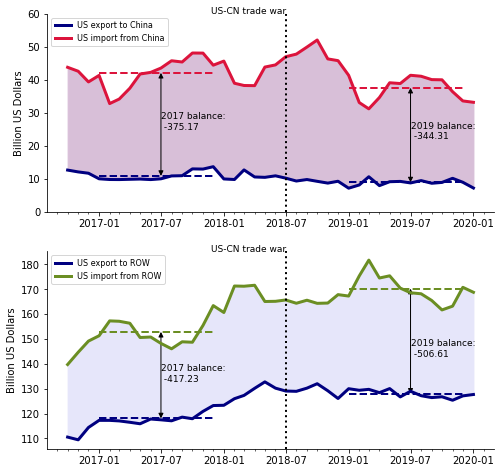

In [18]:
fig, ax = plt.subplots(2,1, figsize = (8,8))
# Major ticks every 6 months.
ax[0].set_ylim([0, 60]) 
ax[0].set_ylabel('Billion US Dollars', fontsize = 10)
ax[1].set_ylabel('Billion US Dollars', fontsize = 10)


ax[0].plot(trade_sum['date'], 
           trade_sum['import_CN']/1000, 
           color = 'crimson', 
           linewidth=3, 
           label = 'US import from China')

ax[0].plot(trade_sum['date'], 
           trade_sum['export_CN']/1000, 
           color = 'navy', 
           linewidth=3, 
           label = 'US export to China')

ax[0].fill_between(trade_sum['date'], 
                   trade_sum['import_CN']/1000, 
                   trade_sum['export_CN']/1000, 
                   color = 'thistle')


ax[1].plot(trade_sum['date'], trade_sum['import_ROW']/1000, color = 'olivedrab', linewidth=3, label = 'US import from ROW')
ax[1].plot(trade_sum['date'], trade_sum['export_ROW']/1000, color = 'navy', linewidth=3, label = 'US export to ROW')
ax[1].fill_between(trade_sum['date'], trade_sum['import_ROW']/1000, trade_sum['export_ROW']/1000, color = 'lavender')

# average lines 2017
trade_sum2017 = trade_sum[(trade_sum['date'] >= pd.Timestamp(2017, 1, 1)) &
                          (trade_sum['date'] <= pd.Timestamp(2017, 12, 1))]

ax[0].plot(trade_sum2017['date'], [trade_sum2017['import_CN'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'crimson')
ax[0].plot(trade_sum2017['date'], [trade_sum2017['export_CN'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'navy')
ax[1].plot(trade_sum2017['date'], [trade_sum2017['import_ROW'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'olivedrab')
ax[1].plot(trade_sum2017['date'], [trade_sum2017['export_ROW'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'navy')

# average lines 2019

trade_sum2019 = trade_sum[(trade_sum['date'] >= pd.Timestamp(2019, 1, 1)) &
                          (trade_sum['date'] <= pd.Timestamp(2019, 12, 1))]

ax[0].plot(trade_sum2019['date'], [trade_sum2019['import_CN'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'crimson')
ax[0].plot(trade_sum2019['date'], [trade_sum2019['export_CN'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'navy')
ax[1].plot(trade_sum2019['date'], [trade_sum2019['import_ROW'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'olivedrab')
ax[1].plot(trade_sum2019['date'], [trade_sum2019['export_ROW'].mean()/1000] * 12, 
           linestyle = 'dashed', linewidth=2, color = 'navy')

# add arrows
myArrow01 = FancyArrowPatch(posA=(dt.datetime(2017,7,1), trade_sum2017['import_CN'].mean()/1000), 
                          posB=(dt.datetime(2017,7,1), trade_sum2017['export_CN'].mean()/1000), 
                          arrowstyle='<|-|>', color='0',
                          mutation_scale=10, shrinkA=0, shrinkB=0)
ax[0].add_artist(myArrow01)

myArrow02 = FancyArrowPatch(posA=(dt.datetime(2019,7,1), trade_sum2019['import_CN'].mean()/1000), 
                          posB=(dt.datetime(2019,7,1), trade_sum2019['export_CN'].mean()/1000), 
                          arrowstyle='<|-|>', color='0',
                          mutation_scale=10, shrinkA=0, shrinkB=0)
ax[0].add_artist(myArrow02)

myArrow11 = FancyArrowPatch(posA=(dt.datetime(2017,7,1), trade_sum2017['import_ROW'].mean()/1000), 
                          posB=(dt.datetime(2017,7,1), trade_sum2017['export_ROW'].mean()/1000), 
                          arrowstyle='<|-|>', color='0',
                          mutation_scale=10, shrinkA=0, shrinkB=0)
ax[1].add_artist(myArrow11)

myArrow12 = FancyArrowPatch(posA=(dt.datetime(2019,7,1), trade_sum2019['import_ROW'].mean()/1000), 
                          posB=(dt.datetime(2019,7,1), trade_sum2019['export_ROW'].mean()/1000), 
                          arrowstyle='<|-|>', color='0', 
                          mutation_scale=10, shrinkA=0, shrinkB=0)
ax[1].add_artist(myArrow12)

# annotate arrows
balance2017_CN = trade_sum2017['export_CN'].sum()/1000 - trade_sum2017['import_CN'].sum()/1000
balance2017_ROW = trade_sum2017['export_ROW'].sum()/1000 - trade_sum2017['import_ROW'].sum()/1000
balance2019_CN = trade_sum2019['export_CN'].sum()/1000 - trade_sum2019['import_CN'].sum()/1000
balance2019_ROW = trade_sum2019['export_ROW'].sum()/1000 - trade_sum2019['import_ROW'].sum()/1000

ax[0].annotate('2017 balance:\n {:.2f}'.format(balance2017_CN), 
              (dt.datetime(2017, 7, 1), 25),
              color='black', ha='left', 
               size=9)
ax[1].annotate('2017 balance:\n {:.2f}'.format(balance2017_ROW), 
              (dt.datetime(2017, 7, 1), 133),
              color='black', ha='left', 
               size=9)
ax[0].annotate('2019 balance:\n {:.2f}'.format(balance2019_CN), 
              (dt.datetime(2019, 7, 1), 22),
              color='black', ha='left', 
               size=9)
ax[1].annotate('2019 balance:\n {:.2f}'.format(balance2019_ROW), 
              (dt.datetime(2019, 7, 1), 143),
              color='black', ha='left', 
               size=9)


for i in range(0, 2):
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[::-1], labels[::-1], fontsize = 8 ,loc = 2)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False) 
    ax[i].axvline(x = dt.datetime(2018,7,1), color='black',
                  linewidth=2, linestyle = 'dotted')

ax[0].annotate('US-CN trade war', 
               (dt.datetime(2018, 7, 1), 60), 
               color='black', ha='right', 
               size=9)
ax[1].annotate('US-CN trade war', 
               (dt.datetime(2018, 7, 1), 185), 
               color='black', ha='right', 
               size=9)


# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax[0].xaxis.set_major_locator(fmt_half_year)
ax[1].xaxis.set_major_locator(fmt_half_year)
# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax[0].xaxis.set_minor_locator(fmt_month)
ax[1].xaxis.set_minor_locator(fmt_month)

plt.savefig('output_graph/US_trade_balance.svg', bbox_inches='tight')